# Оценка трафика и стоимости бота
## Введение
Проект KarpovAI представляет собой телеграм-бота, который отвечает на вопросы пользователей, используя базу знаний YouTube-канала Karpov.Courses. Вместе с ответом также даются ссылки на видео, на основе которых был сформирован ответ.

Бот функционирует на основе RAG-системы с использованием GPT-3.5-turbo. База знаний формируется из транскрибированных видеоматериалов, находящихся в открытом доступе на YouTube-канале Karpov.Courses. Бот обрабатывает запросы, извлекает соответствующий контент и, используя его в качестве контекста, генерирует ответы для пользователей.

Ниже мы приводим оценку затрат на использование бота.
## Используемые инструменты OpenAI API
|Model|Input price|Output price|
| :-------------: |:----------------:| :-----------------:|
|gpt-3.5-turbo-1106| \$0.0010 / 1K tokens| $0.0020 / 1K tokens|
|ada v2|\$0.0001 / 1K tokens| |
|Whisper|\$0.006 / minute| |
## Способ оценки затрат
Для оценки затрат нужно оценить возможный трафик бота. Для оценки трафика мы проанализировали сообщения в основном тг-чате Karpov.Courses за период с 13.09.23 по 12.10.23. С помощью GPT-3.5-turbo были отобраны сообщения по следующим критериям:
- Часто искомые сообщения начинаются с обращения к студентам и просьбой решить какую-нибудь проблему.
- Также искомые сообщения обычно развернутые, и в них детально описывается суть проблемы.
- Искомое сообщение является вопросом по анализу данных или машинному обучению, отвечая на который, можно также приложить различные учебные материалы, ссылки, видео и т.д

Далее к этим вопросам были извлечены из базы знаний наиболее релевантные тексты и потом проведена ручная разметка, соответствуют ли извлеченные тексты вопросам. Количество отобранных вопросов дает представление о возможном трафике бота.

In [49]:
import json
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', None)

## Оценка затрат на работу бота
- За месяц в чате было около 4200 сообщений.
- Из них GPT-3.5-turbo отобрала 435 вопросов.
- 83 из них были вручную отобраны, как вопросы, на которые наш бот сможет извлечь релевантные тексты.

Ниже показано несколько примеров вопросов и отобранных к ним текстов.

При работе бота в качестве контекста предполагается извлекать 3 ноды по 1000 токенов, и еще 1000 токенов отводится на запрос пользователя и промт. На ответ бота также предполагается максимум 1000 токенов. Также на получение эмбеддинга запроса пользователя тратится максимум 1000 токенов.

Таким образом, стоимость одного обращения к боту составляет \\$0.0061 (4 * \\$0.0010 для входных, \\$0.0020 для выходных данных, и \\$0.0001 на получение эмбеддинга). Умножив эту стоимость на оцененное количество ежемесячных запросов (83), получаем ожидаемую месячную стоимость работы бота в \\$0.5063.

In [50]:
df = pd.read_csv("question_dataset.csv")
df.loc[df["manual_evaluation"] == 1, ["chat_question", "retrieved_node"]].head(3)

,chat_question,retrieved_node
0,"всем привет! кто пользуется datalens для визуализации, поделитесь плз своим мнением","Работа вся происходит в веб-интерфейсе. Вам нужно зайти на сайт datalens.yandex.ru, пройти небольшую регистрацию и вы попадаете после этого в Яндекс.Облако, и DataLens является одним из компонентов Яндекс.Облако. Когда вы сюда дальше, уже после регистрации, вы можете пройти, опять же, про DataLens. На основной страничке увидите возможность создать сразу какой-то тип сущностей, который вам нужен, которые есть в DataLens. Либо посмотреть примеры дешбордов, с ними поиграться и посмотреть, как они созданы. Что здесь, в общем-то, интересного есть в интерфейсе? Слева есть панель управления нашими сущностями, и вот эти сущности, они чуть-чуть отличаются от того, к чему мы привыкли с вами в табло. Здесь есть подключения, датасеты, чарты и дешборды. Основное отличие, которое вы, может быть, заметили, что здесь есть отдельное подключение и отдельные датасеты."
1,"спасибо за отклик, я начинаю свой путь в аналитику также в стартапе, данных не так много, нет интеграции между сервисами, файл получаю в csv формате, обрабатываю в jupyter notebook как было на курсе, далее отправляю данные в гугл таблицу и визуализация часть там же, часть попыталась в табло сделать. очень неудобно, и пока нахожусь в раздумьях, как убыстрить все процессы","Мне прислали сколько-то CSV-файлов, нужно было их сочетать, как-то поджойнить и нарисовать пару графиков, по этим графикам сделать выводы. Это то, что касалось какого-то программирования, какой-то статистики. Ну, скажу честно, я пошел по пути наименьшего сопротивления программирования. Такой, так, окей, ну, до этого код я не писал, вот чтобы, ну, понятно, уверенно. То есть никогда не пробовал дальше? Ну, вот в школе писал на Delphi, я понимал, как это работает, но вот так, чтобы сидеть целый день писать код, такого не было. Я такой, так, мне прислали CSV, я быстренько прикинул, какие у меня есть варианты развития событий. У меня есть связка Python-Pandas, сейчас я об этом уверенно говорю, тогда это было чуть сложнее для меня. Есть связка SQL. Есть такое подозрение, что есть Python и Pandas, кажется. Да, да, да. Есть какой-то SQL, и есть третий путь, Excel."
6,"привет.\nподскажите, пожалуйста, pvalue<alpha в тесте Левена, при нормальных распределениях в обеих группах, является веской причиной выбрать u-критерий вместо t-теста?","Их две. Основная и нулевая альтернативная. Когда все учишь по-английски, очень сложно все назад мапить. Нулевая альтернативная. Для нулевой у нас есть правило решения, связанное с пи-уровнем значимости. Он связан со статистикой, которую мы читаем для теста, который мы используем. Тест – это вещь, которая завязана на среднюю и выборочную дисперсию. И у этой статистики есть распределение. В случае этих тестов – это тир распределения. У этого тира распределения есть значение в зависимости от степени свободы. Я продолжаю накидывать другие вещи, потому что не раскрыто. Ладно, без проблем, закапываем. У этой статистики есть распределение, и когда мы ее считаем, мы получаем некоторое значение. У этого значения есть соответствующая ему p-value. И в зависимости от того, как оно соотносится с нашим уровнем альфа, мы делаем статистический вывод."


In [51]:
print(f"Количество отобранных вопросов: {df.manual_evaluation.sum()}")

Количество отобранных вопросов: 83


## Оценка затрат на транскрибацию
Для оценки затрат на транскрибацию нужно проанализировать распределение длин видео в минутах, а также количество нод в каждом транскрибированном видео.

In [44]:
# Загрузка данных из файла CSV
df = pd.read_csv("date_lenght_video_info.csv")
df.head()

,url,title,length,publish_date
0,https://www.youtube.com/watch?v=Api2RW4ogR4,Зачем нужно проходить Симулятор ML? | karpov.courses,98,2022-10-02
1,https://www.youtube.com/watch?v=kYcA_RVDNWM,Redash display | Симулятор SQL | karpov.courses,519,2023-07-06
2,https://www.youtube.com/watch?v=NcDcxOqB52k,Об A/B тестах без A/B тестов | Никита Маршалкин | karpov.courses,161,2021-02-23
3,https://www.youtube.com/watch?v=gujnUx7fveY,Поведенческое интервью | Behavioral Interview | Выпуск 3 | Валерий Бабушкин | karpov.courses,2967,2023-01-21
4,https://www.youtube.com/watch?v=NHLTY9vfElw,Дмитрий Смелов — Самообучение как путь в IT | Подкаст | karpov.courses,3253,2022-08-09


In [45]:
with open("../data/index_storage_1024/docstore.json", "r", encoding="utf-8") as f:
    data_json = json.load(f)

data = {
    "url": [],
    "title": [],
    "nodes_number": []
}
for doc in data_json["docstore/ref_doc_info"].values():
    data["url"].append(doc["metadata"]["url"])
    data["title"].append(doc["metadata"]["title"])
    data["nodes_number"].append(len(doc["node_ids"]))
df_nodes = pd.DataFrame(data)
df = df.merge(df_nodes[["url", "nodes_number"]], on="url", how="left")

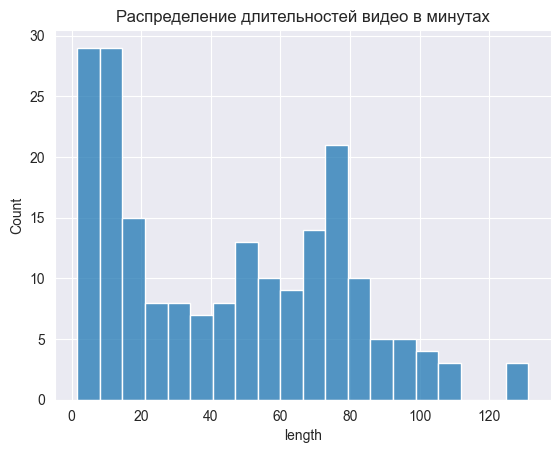

In [46]:
sns.histplot(df_video_info['length'] / 60, bins = 20)
plt.title("Распределение длительностей видео в минутах")
plt.show()

Рассчитаем доверительные интервалы стоимости транскрибации и получения эмбеддингов в новых видео

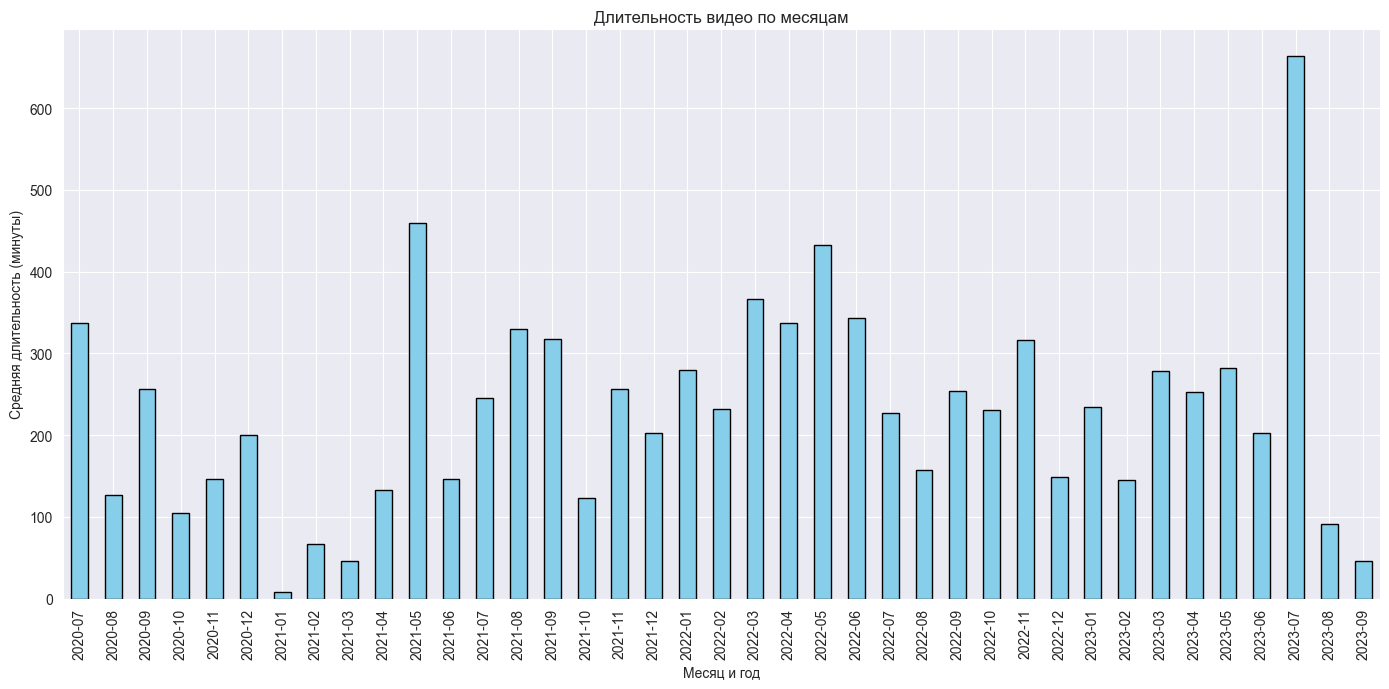

Средние затраты на транскрибацию в месяц: $1.39
Стандартное отклонение затрат на транскрибацию: $0.77
95% доверительный интервал для затрат на транскрибацию: от $1.15 до $1.63

Средние затраты на получение эмбеддингов в месяц: $0.01
Стандартное отклонение затрат на эмбеддинги: $0.01
95% доверительный интервал для затрат на эмбеддинги: от $0.01 до $0.01


In [47]:
# Преобразование столбца даты публикации в формат datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Преобразование длительности видео в минуты
df['duration_minutes'] = df['length'] / 60

# Группировка по месяцам и расчет длительности видео за месяц
monthly_duration_mean = df.groupby(df['publish_date'].dt.to_period('M'))['duration_minutes'].sum()

# Построение графика длительности видео в месяц
plt.figure(figsize=(14, 7))
monthly_duration_mean.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Длительность видео по месяцам')
plt.xlabel('Месяц и год')
plt.ylabel('Средняя длительность (минуты)')
plt.xticks(rotation=90)
plt.tight_layout()  # Автоматическая подгонка параметров фигуры для красивого отображения
plt.show()

# Расчет затрат на транскрибацию для каждого видео
transcription_cost_per_minute = 0.006  # Стоимость транскрибации за минуту
df['transcription_cost'] = df['duration_minutes'] * transcription_cost_per_minute

# Подсчет стоимости получения эмбеддингов для каждого видео
embedding_cost_per_node = 0.0001
df['embedding_cost'] = df['nodes_number'] * embedding_cost_per_node

# Группировка по месяцам и расчет средних затрат на транскрибацию и эмбеддинги
monthly_transcription_costs = df.groupby(df['publish_date'].dt.to_period('M'))['transcription_cost'].sum()
monthly_embedding_costs = df.groupby(df['publish_date'].dt.to_period('M'))['embedding_cost'].sum()

# Расчет среднего значения и 95% доверительного интервала для затрат на транскрибацию
mean_transcription_cost = monthly_transcription_costs.mean()
std_transcription_cost = monthly_transcription_costs.std()
confidence_interval_95_transcription = stats.norm.interval(
    0.95, loc=mean_transcription_cost, scale=std_transcription_cost / len(monthly_transcription_costs)**0.5
)

# Расчет среднего значения и 95% доверительного интервала для затрат на эмбеддинги
mean_embedding_cost = monthly_embedding_costs.mean()
std_embedding_cost = monthly_embedding_costs.std()
confidence_interval_95_embedding = stats.norm.interval(
    0.95, loc=mean_embedding_cost, scale=std_embedding_cost / len(monthly_embedding_costs)**0.5
)

# Вывод результатов для транскрибации
print(f"Средние затраты на транскрибацию в месяц: ${mean_transcription_cost:.2f}")
print(f"Стандартное отклонение затрат на транскрибацию: ${std_transcription_cost:.2f}")
print(f"95% доверительный интервал для затрат на транскрибацию: от ${confidence_interval_95_transcription[0]:.2f} до ${confidence_interval_95_transcription[1]:.2f}")
print()
# Вывод результатов для эмбеддингов
print(f"Средние затраты на получение эмбеддингов в месяц: ${mean_embedding_cost:.2f}")
print(f"Стандартное отклонение затрат на эмбеддинги: ${std_embedding_cost:.2f}")
print(f"95% доверительный интервал для затрат на эмбеддинги: от ${confidence_interval_95_embedding[0]:.2f} до ${confidence_interval_95_embedding[1]:.2f}")


## Общая оценка затрат
Суммируя оценку затрат на работу бота и транскрибацию, общие затраты на поддержание бота составляют от \\$1.67 до \\$2.14 в месяц. 